In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [12]:
k = 3
data = pd.read_csv('kmeans.csv')
print(data)
x1 = data['X1'].values
x2 = data['X2'].values
X = np.array(list(zip(x1, x2)))

    X1   X2
0  5.9  3.2
1  4.6  2.9
2  6.2  2.8
3  4.7  3.2
4  5.5  4.2
5  5.0  3.0
6  4.9  3.1
7  6.7  3.1
8  5.1  3.8
9  6.0  3.0


In [3]:
C_x = [6.2, 6.6 ,6.5]
C_y = [3.2, 3.7, 3.0]
centroid = np.array(list(zip(C_x, C_y)))
centroid_old = np.zeros(centroid.shape)
print("Initial Centroids: \n", centroid_old)

Initial Centroids: 
 [[0. 0.]
 [0. 0.]
 [0. 0.]]


In [4]:
def euclidean(a, b, ax=1):
  return np.linalg.norm(a-b, axis=ax)

In [5]:
clusters = np.zeros(len(X))
error = euclidean(centroid, centroid_old, None)
print("Initial Clusters", clusters)
print("Initial Error ........ ", error)

Initial Clusters [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Initial Error ........  12.53714481052205


In [6]:
iter = 0

while error != 0:
  iter = iter + 1
  for i in range(len(X)):
    distances = euclidean(X[i], centroid)
    cluster = np.argmin(distances)
    clusters[i] = cluster

  centroid_old = deepcopy(centroid)
  for p in range(k):
    points = [X[j] for j in range(len(X)) if clusters[j] == p]
    centroid[p] = np.mean(points, axis=0)

  print("\nCentroid after ", iter, " iteration \n", centroid)
  error = euclidean(centroid, centroid_old, None)
  print("Error ....... ", error)

  print("Clusters: ", clusters)



Centroid after  1  iteration 
 [[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
Error .......  1.588639515498743
Clusters:  [0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]

Centroid after  2  iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error .......  0.5484788798419251
Clusters:  [2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]

Centroid after  3  iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error .......  0.0
Clusters:  [2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]


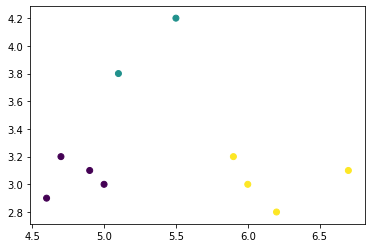

In [7]:
plt.scatter(x1, x2, c=clusters)
plt.show()
